# Power and Influence: Central Positions in Networks



In [1]:
%%capture
# Housekeeping
# As explained before, it is best practice to load the modules at the start
import sys
sys.path.insert(1, '../')
import networkx as nx
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
# This line allows visualizations within the notebook
%matplotlib inline 
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

# Make sure you download econ46_library.py from our course material and save it in the same folder as then notebooks
# this file has some functions specifically coded for the class
from supporting_material import econ46_library as el

# These modules are only to have some interactive pieces of code in the notebooks
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display



### Dutch High School Network
Now, let's explore the social network of a high school class from the Netherlands. It was collected by Andrea Knech for a project on friendship selection and friendship influence.

You have already seen how to create a network and look at some of its features. Here we will look at other ways to get the same information and will also expand our analysis.


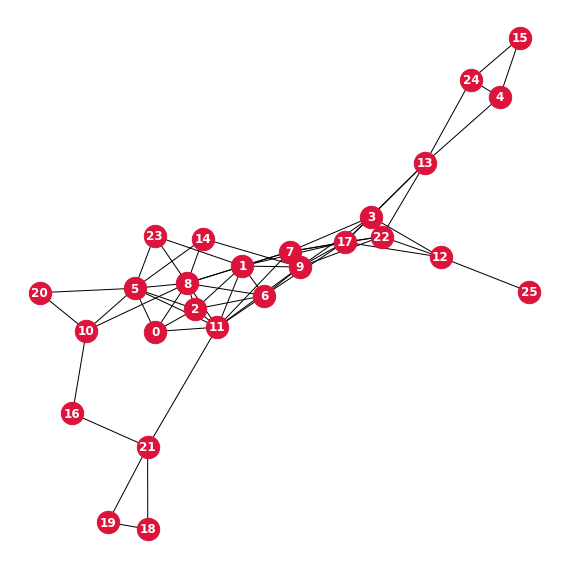

In [3]:
# Load data with network information, list of edges in the network:
dutch_hs_dataframe = pd.read_csv('../Data/dutch_hs/dutch_class_t0.csv')

# Create a network using the adjancey matrix
G_hs = nx.from_pandas_edgelist(dutch_hs_dataframe)

# Visualize the network
el.plot_simple_graph(G_hs)

In [4]:
# List the nodes:
G_hs.nodes()

NodeView((0, 2, 5, 11, 8, 1, 6, 7, 9, 17, 23, 3, 22, 12, 13, 4, 15, 24, 10, 14, 20, 16, 21, 25, 18, 19))

In [5]:
# Counting the number of nodes is as simple as computing the length of the node list:
len(G_hs.nodes())

26

In [6]:
# This time let's save the list of edges as an object and print  it instead of just running the command
edge_list = G_hs.edges()
print(edge_list)


[(0, 2), (0, 5), (0, 11), (0, 8), (2, 1), (2, 5), (2, 6), (2, 11), (2, 8), (5, 10), (5, 11), (5, 14), (5, 20), (5, 8), (5, 23), (11, 1), (11, 6), (11, 7), (11, 8), (11, 9), (11, 21), (8, 1), (8, 6), (8, 7), (8, 10), (8, 14), (8, 23), (1, 6), (1, 7), (1, 9), (1, 17), (1, 23), (6, 9), (6, 17), (7, 3), (7, 9), (7, 17), (7, 22), (9, 3), (9, 14), (9, 22), (9, 17), (17, 3), (17, 12), (17, 13), (17, 22), (3, 22), (3, 12), (3, 13), (22, 12), (22, 13), (12, 25), (13, 4), (13, 24), (4, 15), (4, 24), (15, 24), (10, 16), (10, 20), (16, 21), (21, 18), (21, 19), (18, 19)]


In [7]:
# Similarly we can compute the number of edges in the graph by calling the edges attribute of the G0 object
len(edge_list)

63

With 26 nodes the network could have at most 26*(26-1)/2=325 edges.

Since there are only 63 we can talk about how dense the network with respect to that fully connected or complete network.

In [8]:
density = 63/325
# Note how you can embbed the value of a variable into a line of text.
print('Density: %s' % density)

Density: 0.19384615384615383


### Centrality Measures
#### Degree  Distribution

The **degree** of a node is the number of connections the node has. 

With networkx is very simple to take a look at the degree distribution. 

Each node has a degree attribute and they are all stored as a Dictionary, which means you can also query the degree of specific nodes by typing `G_hs.degree[node id]`:

In [9]:
# Degree attribute of a networkx network.
G_hs.degree

DegreeView({0: 4, 2: 6, 5: 8, 11: 9, 8: 10, 1: 8, 6: 6, 7: 7, 9: 8, 17: 8, 23: 3, 3: 6, 22: 6, 12: 4, 13: 5, 4: 3, 15: 2, 24: 3, 10: 4, 14: 3, 20: 2, 16: 2, 21: 4, 25: 1, 18: 2, 19: 2})

In [10]:
G_hs.degree([0,1])

DegreeView({0: 4, 1: 8})

In [11]:
G_hs.degree[8]

10

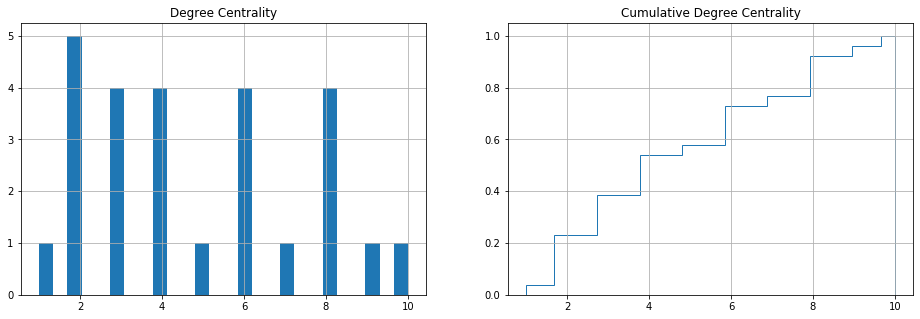

In [12]:
# And we have a function in the class library to plot the distribution:
el.plot_centrality_dist(G_hs,'Degree Centrality')

#### Clustering
The **clustering coefficient** represents the share of a node's connections that are connected to each other and is also readily available with networkx.

In [13]:
nx.clustering(G_hs)

{0: 1.0,
 2: 0.7333333333333333,
 5: 0.35714285714285715,
 11: 0.4444444444444444,
 8: 0.37777777777777777,
 1: 0.5357142857142857,
 6: 0.6666666666666666,
 7: 0.5714285714285714,
 9: 0.4642857142857143,
 17: 0.5,
 23: 0.6666666666666666,
 3: 0.6666666666666666,
 22: 0.6666666666666666,
 12: 0.5,
 13: 0.4,
 4: 0.6666666666666666,
 15: 1.0,
 24: 0.6666666666666666,
 10: 0.3333333333333333,
 14: 0.3333333333333333,
 20: 1.0,
 16: 0,
 21: 0.16666666666666666,
 25: 0,
 18: 1.0,
 19: 1.0}

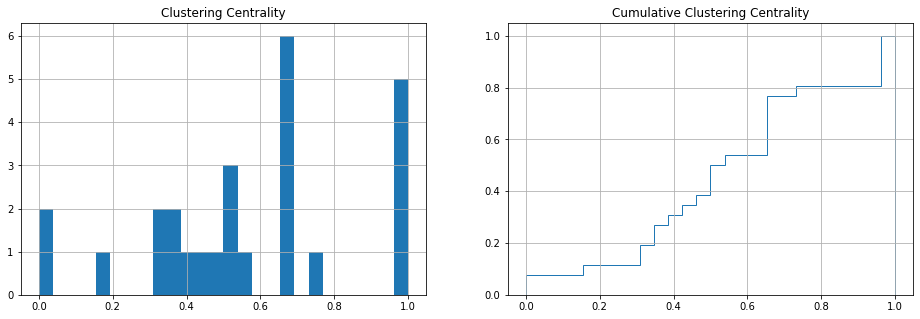

In [14]:
el.plot_centrality_dist(G_hs,'Clustering Centrality')

#### Betweenness Centrality

In [15]:
nx.betweenness_centrality(G_hs)

{0: 0.0,
 2: 0.013928254980886559,
 5: 0.08934920634920634,
 11: 0.2870096492201755,
 8: 0.14488042951200847,
 1: 0.10222972933499253,
 6: 0.056635972214919575,
 7: 0.14570288386077862,
 9: 0.12880443046232518,
 17: 0.2284592892487629,
 23: 0.0039270904534062425,
 3: 0.07388146648672965,
 22: 0.07388146648672965,
 12: 0.08,
 13: 0.22,
 4: 0.03833333333333334,
 15: 0.0,
 24: 0.03833333333333334,
 10: 0.05294627594627594,
 14: 0.0141514012303486,
 20: 0.0,
 16: 0.015000000000000001,
 21: 0.1858791208791209,
 25: 0.0,
 18: 0.0,
 19: 0.0}

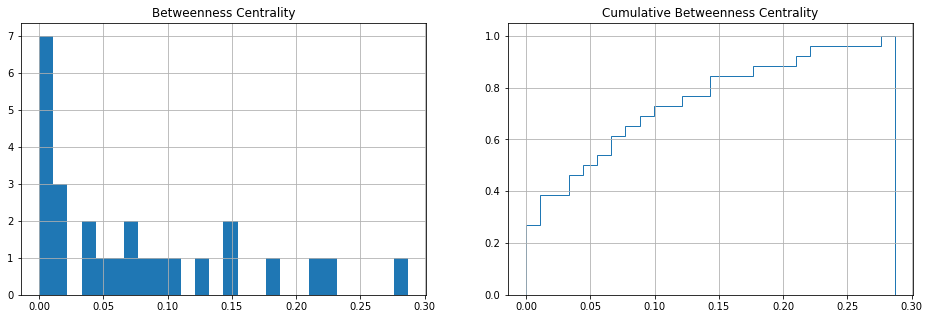

In [16]:
el.plot_centrality_dist(G_hs,'Betweenness Centrality')

Below you can interactively plot the network for different periods and observe how the different centrality measures reflect a node's position in the network.

In [17]:
display(el.dutch_nets,el.dutch_types,el.dutch_lays,el.dutch_atts,el.dutch_y)


ToggleButtons(description='Period:', options=('t=0', 't=1', 't=2', 't=3'), tooltips=('High School Classroom in…

ToggleButtons(description='Types', options=('None', 'Reported Gender'), tooltips=('High School Classroom in th…

ToggleButtons(description='Layout:', options=('Kamada Kawai', 'Circle', 'Spring', 'Random'), tooltips=('Circul…

Dropdown(description='Attribute:', options=('', 'Degree Centrality', 'Clustering Centrality', 'Betweenness Cen…

Output()

In [18]:

display(el.comp_accordion,el.comp_lays,el.comp_y)


Accordion(children=(VBox(children=(ToggleButtons(description='Network Type:', options=('Dutch High School', 'E…

ToggleButtons(description='Layout:', options=('Circle', 'Kamada Kawai', 'Spring', 'Random'), tooltips=('Circul…

Output()

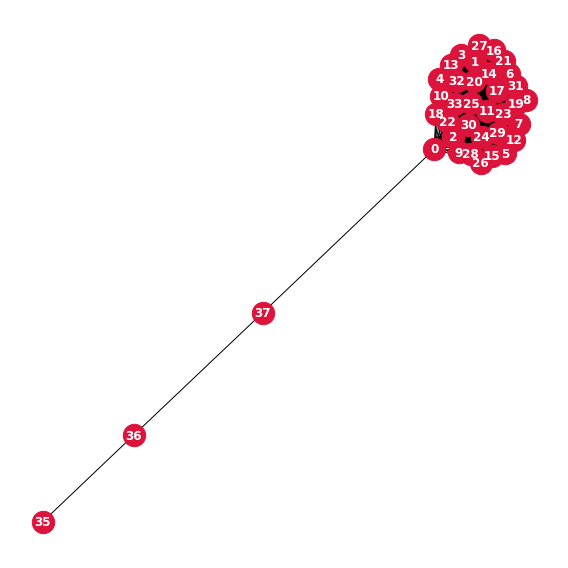

Diameter: 4
Average distance: 1.3033033033033032
Diameter/Average distance ratio: 3.069124423963134


In [9]:
G = nx.complete_graph(34)
G.add_nodes_from([35, 36, 37])
G.add_edge(35, 36)
G.add_edge(36, 37)
G.add_edge(37, 0)

# Visualize the network
el.plot_simple_graph(G)
print(f"Diameter: {nx.diameter(G)}")
print(f"Average distance: {nx.average_shortest_path_length(G)}")
print(f"Diameter/Average distance ratio: {nx.diameter(G)/ nx.average_shortest_path_length(G)}")